# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [247]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as pkl
import math

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

 Linear Regression Training Data Frame 

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302


 Linear Regression Testing Data Frame 

    YearsExperience  Salary
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872




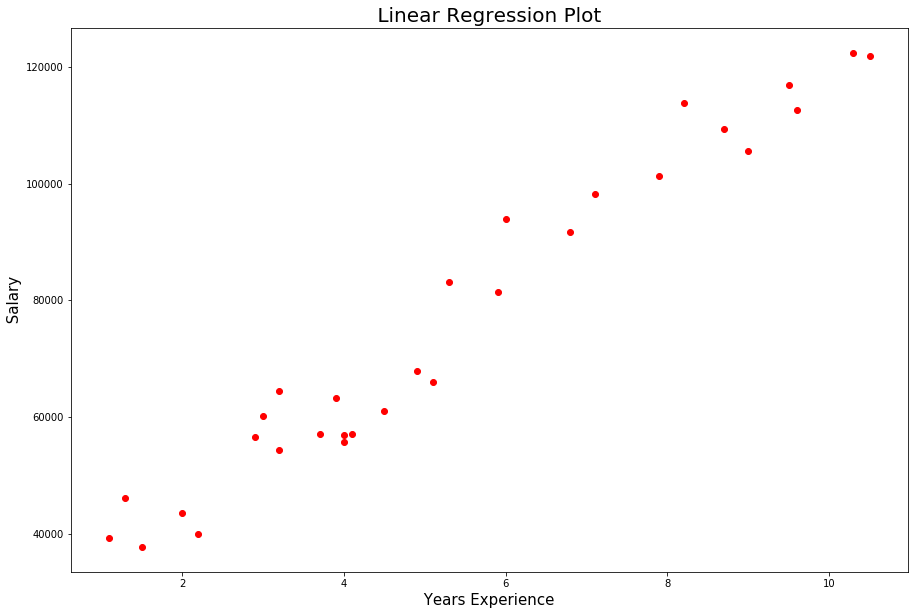

In [248]:
data = pd.read_csv(r'C:\Users\badri\Desktop\MLBasics-master\Data\SalaryData.csv',sep = " ")

test_split = int(0.75 * data.shape[0])

linear_data_train = data.loc[:test_split]

print(" Linear Regression Training Data Frame \n")

print(linear_data_train)

print("\n")

linear_data_test = data.loc[test_split+1:]

print(" Linear Regression Testing Data Frame \n")

print(linear_data_test)

print("\n")

fig,ax1 = plt.subplots()

ax1.set_title(" Linear Regression Plot ",fontsize = 20)

ax1.set_xlabel(" Years Experience ",fontsize = 15)

ax1.set_ylabel(" Salary ",fontsize = 15)

X = data['YearsExperience']

Y = data['Salary']

ax1.scatter(X,Y,color = 'red')

plt.show()

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

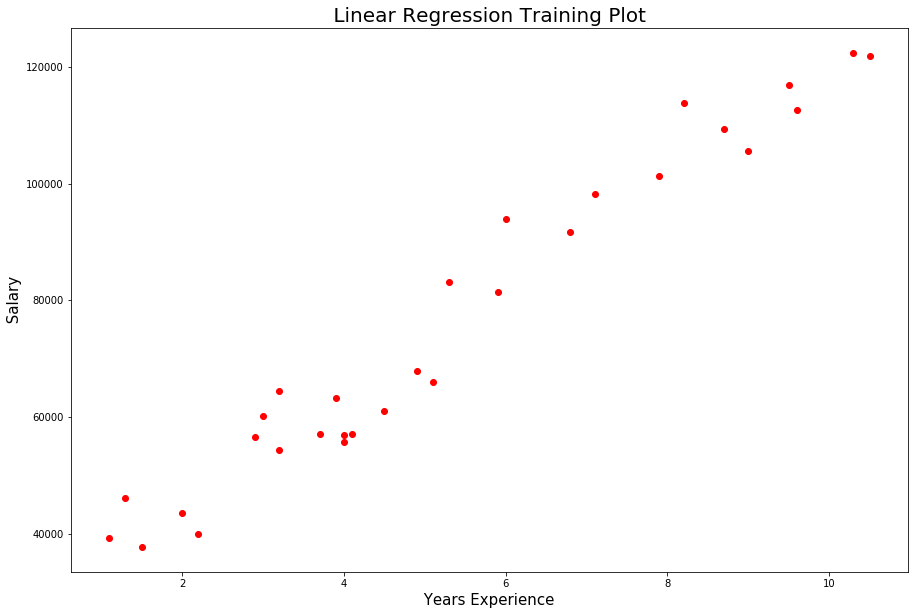

In [249]:
X = data['YearsExperience']

X = X.to_numpy()

X = X.reshape(-1,1) 

ones = np.ones([X.shape[0], 1])  

X = np.concatenate([ones, X],1) 

y = data['Salary']

y = y.to_numpy()

y = y.reshape(-1,1)

fig,ax1 = plt.subplots()

ax1.set_title(" Linear Regression Training Plot ",fontsize = 20)

ax1.set_xlabel(" Years Experience ",fontsize = 15)

ax1.set_ylabel(" Salary ",fontsize = 15)

ax1.scatter(data['YearsExperience'],data['Salary'],color = 'red')

plt.show()

Cost Function :  3250924257.488333
Theta Values :  [[ 6478.26970338 12316.06874768]]
Cost Function After Gradient Descent :  55956362.298390165


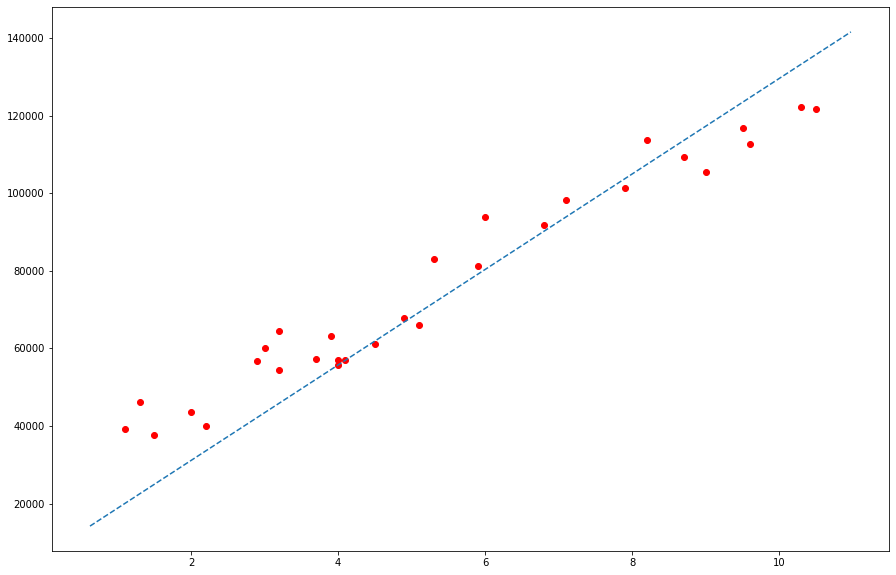

In [252]:
alpha = 0.0001

iters = 1000000

theta = np.array([[1.0, 1.0]])

def computeCost(X, y, theta):
    
    inner = np.power(((X @ theta.T) - y), 2) 
    
    return np.sum(inner) / (2 * len(X))

print("Cost Function : ",computeCost(X, y, theta))

def gradientDescent(X, y, theta, alpha, iters):
    
    for i in range(iters):
        
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        
        cost = computeCost(X, y, theta)
        
    return (theta, cost)

g, cost = gradientDescent(X, y, theta, alpha, iters)  

print("Theta Values : " ,g)

print("Cost Function After Gradient Descent : ",cost)


plt.scatter(data['YearsExperience'].to_numpy().reshape(-1,1), y,color = "red")

axes = plt.gca()

x_vals = np.array(axes.get_xlim()) 

y_vals = g[0][0] + g[0][1]* x_vals 

plt.plot(x_vals, y_vals, '--')


In [253]:
y_pred = []

x_actual = data['YearsExperience'].to_numpy()

y_actual = data['Salary'].to_numpy()

y_pred = g[0][0] + g[0][1] * x_actual

mse = np.sum((y_pred - y_actual)**2)

rmse = np.sqrt(mse/30)

print("RMSE Value : ",rmse)

ssr = np.sum((y_pred - y_actual)**2)

print("SSR Value : ",ssr)

sst = np.sum((y_actual - np.mean(y_actual))**2)

print("SST Value : ",sst)

r2_score = 1 - (ssr/sst)

print("R2 Score : ",r2_score)


RMSE Value :  10578.881065442618
SSR Value :  3357381737.90341
SST Value :  21794977852.0
R2 Score :  0.8459561757437013


## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

 Logistic Regression Training Data Frame 

    YearsExperience  Salary  Salary<60000
0               1.1   39343             1
1               1.3   46205             1
2               1.5   37731             1
3               2.0   43525             1
4               2.2   39891             1
5               2.9   56642             1
6               3.0   60150             0
7               3.2   54445             1
8               3.2   64445             0
9               3.7   57189             1
10              3.9   63218             0
11              4.0   55794             1
12              4.0   56957             1
13              4.1   57081             1
14              4.5   61111             0
15              4.9   67938             0
16              5.1   66029             0
17              5.3   83088             0
18              5.9   81363             0
19              6.0   93940             0
20              6.8   91738             0
21              7.1   98273      

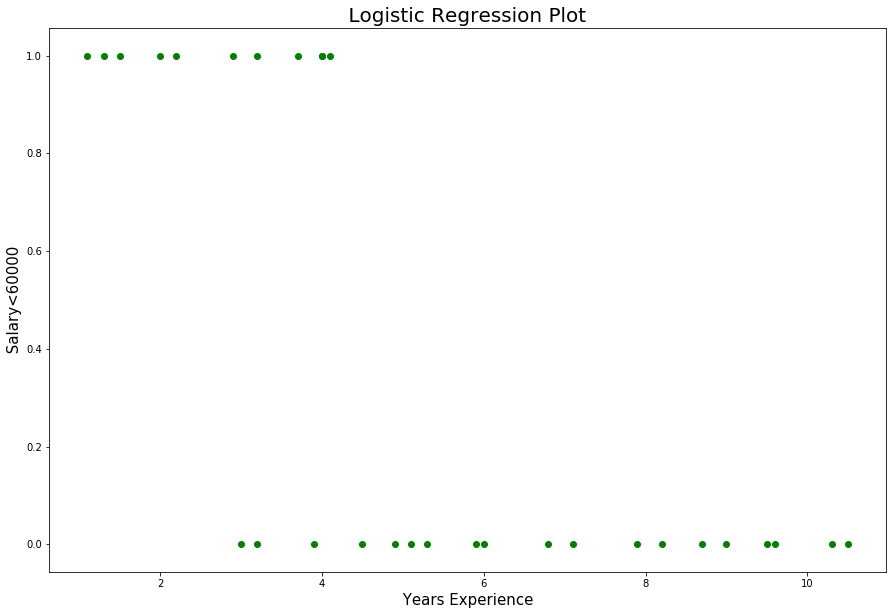

In [9]:
data1 = pd.read_csv(r'C:\Users\badri\Desktop\MLBasics-master\Data\SalaryData.csv',sep = " ")

salarylessthan60000 = []

for sal in data1['Salary']:
    
    salarylessthan60000.append(int(sal < 60000))
    
data1['Salary<60000'] = salarylessthan60000

test_split = int(0.75 * data1.shape[0])

logistic_data_train = data1.loc[:test_split]

logistic_data_test = data1.loc[test_split+1:]

print(" Logistic Regression Training Data Frame \n")

print(logistic_data_train)

print("\n")

print(" Logistic Regression Testing Data Frame \n")

print(logistic_data_test)

print("\n")

fig,ax1 = plt.subplots()

ax1.set_title(" Logistic Regression Plot ",fontsize = 20)

ax1.set_xlabel(" Years Experience ",fontsize = 15)

ax1.set_ylabel(" Salary<60000 ",fontsize = 15)

X = data1['YearsExperience']

Y = data1['Salary<60000']

ax1.scatter(X,Y,color = 'green')

plt.show()

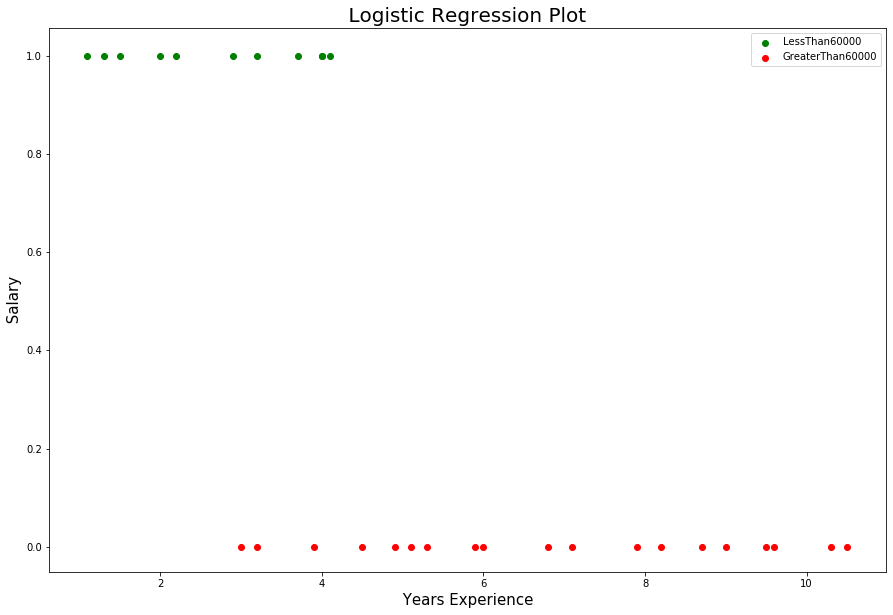

In [244]:
X = data1.iloc[:,:-1]

Y = data1.iloc[:, -1]

lessthan60000 = data1.loc[Y == 1]

greaterthan60000 =  data1.loc[Y == 0]

fig,ax1 = plt.subplots()

ax1.set_title(" Logistic Regression Plot ",fontsize = 20)

ax1.set_xlabel(" Years Experience ",fontsize = 15)

ax1.set_ylabel(" Salary ",fontsize = 15)

ax1.scatter(lessthan60000['YearsExperience'],lessthan60000['Salary<60000'],color = 'green',label = 'LessThan60000')

ax1.scatter(greaterthan60000['YearsExperience'],greaterthan60000['Salary<60000'],color = 'red', label='GreaterThan60000')

plt.legend()

plt.show()


ACCL :  0.8
Slope:  -0.3920665178945363
Intercept:  0.9064013768372572


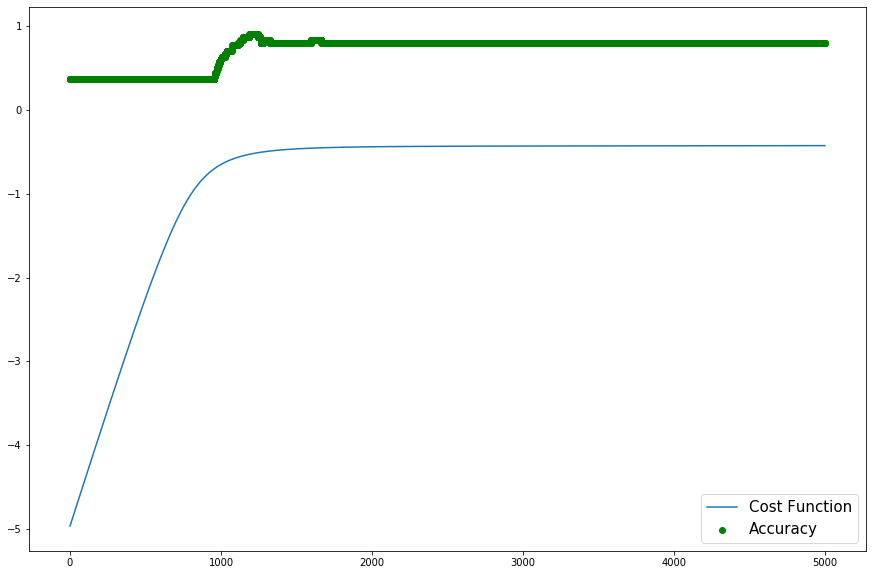

In [245]:
def sigmoid(X):
    
    return (1 / (1 + np.exp((-X))))

x0 = 1

x1 = 1

rate = 0.0003

x = np.array(data1['YearsExperience'])

y = np.array(data1['Salary<60000'])

theta1 = 0.0

theta2 = 0.0

acc=[]

cost = []

iter = 0

while iter < 5000:
    
    cost.append(0.0)
    
    theta1 = 0.0
    
    theta2 = 0.0
    
    acc.append(0.0)
    
    for i in range(len(x)):
        
        y_pred = sigmoid(x[i] * x1 + x0)
        
        theta1 += y_pred - y[i]
        
        theta2 += (y_pred - y[i] )* x[i]
        
        cost[iter] += y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred)
        
        if int(y_pred > 0.5) == y[i]:
            
            acc[iter] += 1
            
    acc[iter] = acc[iter] / len(x)
    
    cost[iter] /= len(x)
    
    x0 = x0 - rate / len(x)  * theta1 
    
    x1 = x1 - rate / len(x)  * theta2
   
    iter += 1
    
print("ACCL : ",acc[iter-2])

print("Slope: ",x1)

print("Intercept: ",x0)
    
plt.plot([i for i in range(iter)],cost,label = 'Cost Function')

plt.scatter(x=[i for i in range(iter)],y=acc, label = 'Accuracy',color='green')

plt.legend(loc='lower right',fontsize=15)

plt.show()

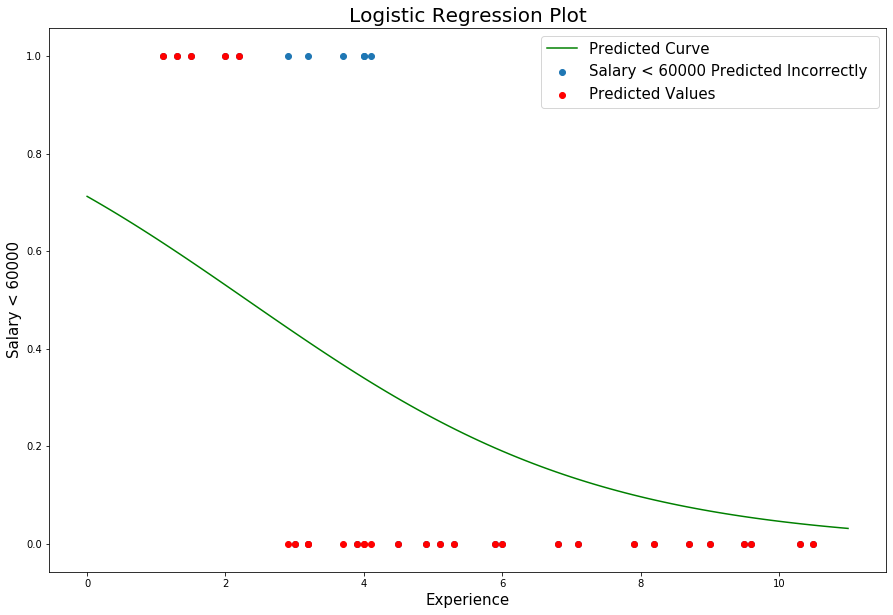

In [243]:
x_plt = np.linspace(0,11,100)

y_plt = np.array([sigmoid(xi * x1+ x0) for xi in x_plt])


fig,ax1 = plt.subplots()

ax1.scatter(data1['YearsExperience'],data1['Salary<60000'],label = 'Salary < 60000 Predicted Incorrectly ')

ax1.set_title('Logistic Regression Plot',fontsize = 20)

ax1.set_xlabel('Experience',fontsize = 15)

ax1.set_ylabel('Salary < 60000',fontsize = 15)

x_pred = np.array(data1['YearsExperience'])

y_pred = [int(sigmoid(xi * x1 + x0) > 0.5) for xi in x_pred]

ax1.plot(x_plt,y_plt,color = 'green',label = 'Predicted Curve')

ax1.scatter(x_pred,y_pred,color = 'red',label = 'Predicted Values')

ax1.legend(loc= 'upper right',fontsize=15)

plt.show()

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.